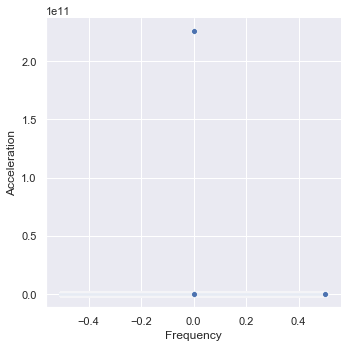

In [2]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cwd = os.getcwd()
csv_data = []
sns.set(style="darkgrid")
data_path = os.path.join(cwd, "data")
for file in os.listdir(data_path):
    ext = os.path.splitext(file)[-1].lower()
    if ext == ".csv":
        file_path = os.path.join(data_path, file)
        with open(file_path, 'r') as f1:
            csv_file = csv.reader(f1)
            data_list = []
            for row in csv_file:
                data_list.extend(row)
            csv_data.append(data_list)
        break

datasets = []
for data in csv_data:
    t = np.arange(len(data))
    accel = np.fft.fft(data)
    freq = np.fft.fftfreq(t.shape[-1])
    data_dict = {'Frequency': freq, 'Acceleration': accel}
    dataset = pd.DataFrame(data=data_dict)
    sns.relplot(x='Frequency', y='Acceleration', data=dataset)
    plt.show()
    datasets.append(dataset)
